In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

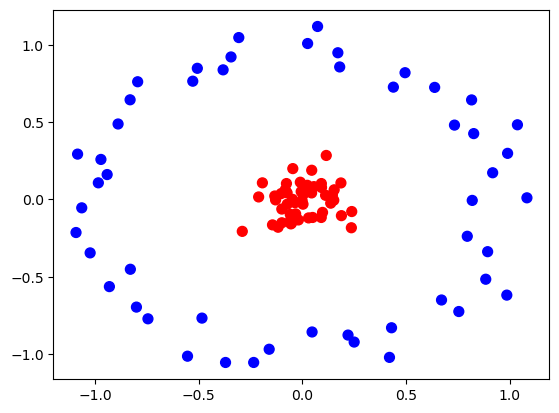

In [23]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [25]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

In [27]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

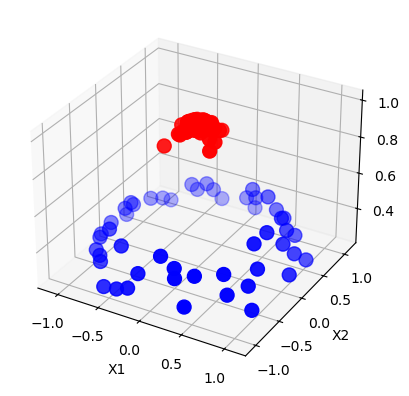

In [28]:
plot_3d_plot(X,y)

In [29]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

1.0

In [31]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

1.0

In [33]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\karti\AppData\Local\Temp\ipykernel_20308\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


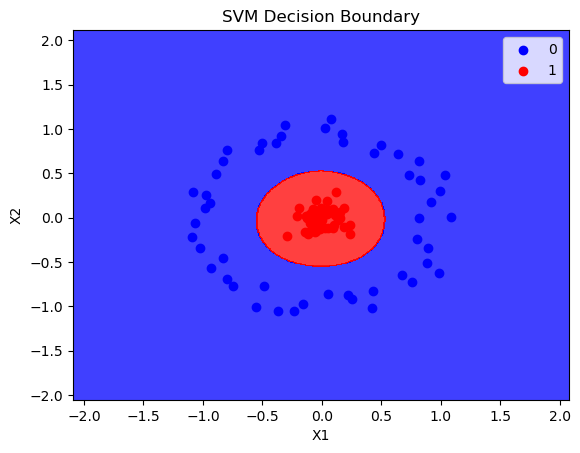

In [34]:
plot_decision_boundary(X, y, rbf_classifier)

In [35]:
X

array([[ 1.45016319e-01,  3.00599553e-02],
       [-9.31310317e-01, -5.63362340e-01],
       [ 8.94361549e-01, -3.37518402e-01],
       [-1.88963128e-02, -1.32408395e-01],
       [ 7.96053815e-01, -2.37949971e-01],
       [ 2.36574060e-01, -1.82905623e-01],
       [-1.33000328e-01,  2.23566688e-02],
       [-4.69422467e-02,  5.25013074e-04],
       [-5.21773752e-02, -1.53189875e-01],
       [-1.60045812e-01, -9.68122631e-01],
       [ 1.03816825e+00,  4.82659375e-01],
       [-7.94844536e-01,  7.60755152e-01],
       [-1.09241158e+00, -2.13675274e-01],
       [ 3.93497448e-03,  3.19842303e-02],
       [-8.31353851e-01,  6.44110405e-01],
       [ 8.20018347e-01, -6.10278160e-03],
       [-7.30173915e-02, -3.09368964e-02],
       [-5.63453003e-03,  5.09781896e-02],
       [-5.54187270e-01, -1.01304496e+00],
       [ 6.71762957e-01, -6.49787435e-01],
       [ 4.95893629e-02, -1.16375181e-01],
       [-4.60474988e-02,  1.99388400e-01],
       [ 1.51699828e-01, -4.86894899e-03],
       [-1.

In [36]:
np.exp(-(X**2)).sum(1)

array([1.97828666, 1.14812404, 1.34171225, 1.9822638 , 1.47557687,
       1.91266901, 1.98196675, 1.99779858, 1.9740873 , 1.36640967,
       1.13253093, 1.09224535, 1.25856935, 1.99896205, 1.16142068,
       1.51042935, 1.99372601, 1.99737285, 1.09390436, 1.29240912,
       1.98409203, 1.95890603, 1.97722623, 1.23781928, 1.40071461,
       1.98638086, 1.99821401, 1.35967244, 1.99109254, 1.36775016,
       1.31891058, 1.87775287, 1.44826124, 1.32386392, 1.98345167,
       1.25683324, 1.1906697 , 1.15703961, 1.22591818, 1.317817  ,
       1.36704433, 1.99906191, 1.34620196, 1.98495983, 1.47796834,
       1.96780254, 1.20110764, 1.98109262, 1.30869399, 1.97770083,
       1.99002721, 1.37697897, 1.26087059, 1.95415442, 1.14291593,
       1.97231545, 1.9875784 , 1.98733728, 1.29323321, 1.95459594,
       1.2416175 , 1.05987952, 1.36149648, 1.98927603, 1.41636095,
       1.95282792, 1.9983043 , 1.98549507, 1.93866934, 1.37800833,
       1.98677947, 1.28975381, 1.90905596, 1.17411659, 1.97278

In [37]:
X_new=np.exp(-(X**2))